<a href="https://colab.research.google.com/github/gantapriyanka1325/DeepLearningLab/blob/main/program12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12.Implement an Auto encoder to de-noise image.



In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D


In [9]:
# 1. Load CIFAR-10 data_batch_1


with open("/content/data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding='bytes')

X = batch[b'data']
X = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
X = X.astype("float32") / 255.0    # normalize

print("Dataset loaded:", X.shape)

Dataset loaded: (10000, 32, 32, 3)


In [10]:
# 2. Add Gaussian noise

noise_factor = 0.2
X_noisy = X + noise_factor * np.random.randn(*X.shape)
X_noisy = np.clip(X_noisy, 0., 1.)

# Split into training/testing
X_train, X_test = X_noisy[:4000], X_noisy[4000:5000]
Y_train, Y_test = X[:4000], X[4000:5000]   # original clean images



In [11]:
# 3. Build Convolutional Autoencoder

input_img = Input(shape=(32, 32, 3))

# --- Encoder ---
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(16, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# --- Decoder ---
x = Conv2D(16, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

# Create autoencoder model
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 4. Train Autoencoder

history = autoencoder.fit(
    X_train, Y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, Y_test)
)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - loss: 0.0478 - val_loss: 0.0188
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0173 - val_loss: 0.0137
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - loss: 0.0137 - val_loss: 0.0121
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - loss: 0.0118 - val_loss: 0.0106
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - loss: 0.0109 - val_loss: 0.0101


In [13]:
# 5. Evaluate model

loss = autoencoder.evaluate(X_test, Y_test, verbose=0)
print(f"\n Test Reconstruction Loss (MSE): {loss:.4f}")




 Test Reconstruction Loss (MSE): 0.0101


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


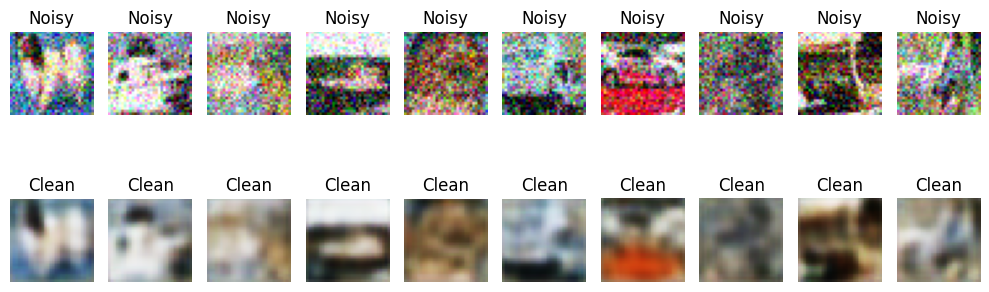

In [14]:
# 6. Denoise images and visualize


decoded_imgs = autoencoder.predict(X_test[:10])

plt.figure(figsize=(10, 4))
for i in range(10):
    # Noisy
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i])
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(2, 10, i+11)
    plt.imshow(decoded_imgs[i])
    plt.title("Clean")
    plt.axis('off')

plt.tight_layout()
plt.show()

